In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df=pd.read_csv("HousingData.csv")

In [62]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [67]:
df= df.dropna()

In [69]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [68]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [71]:
x= df.drop("MEDV",axis=1)
y=df["MEDV"]

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=3)

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler=StandardScaler()

In [76]:
xtrain=scaler.fit_transform(xtrain)

In [77]:
xtest=scaler.transform(xtest)

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
regression=LinearRegression()
regression.fit(xtrain,ytrain)

LinearRegression()

In [81]:
mse=cross_val_score(regression,xtrain,ytrain,scoring='neg_mean_squared_error',cv=10)

In [83]:
np.mean(mse)

-23.141536805395727

In [86]:
reg_pred=regression.predict(xtest)

In [87]:
reg_pred

array([12.76103467, 13.72592931, 31.80369389, 20.94322137, 35.50941999,
       32.63590506, 17.01168725, 17.52084464, 23.54120874, 32.47818537,
       22.87021345, 18.3603772 , 28.95367614, 38.99620419, 38.28031886,
       24.85456254, 23.09890219, 31.75448295, 17.92322414, 25.61861758,
       27.5361058 , 16.65439542, 18.77933359, 11.18467743, 10.96829127,
       20.95352253,  9.57681667, 21.41842703, 28.23364384, 19.52897046,
       34.23397376, 28.64327936, 20.96754084, 13.78427261, 24.90116805,
       12.7149722 , 13.56574652, 20.60963494, 34.62131722, 19.69263052,
       23.42562347, 34.32263174, 19.84087031, 19.86599489, 19.71889448,
       21.07181398, 14.63709478, 22.18919916, 18.81674765, 24.43194385,
       14.67672743, 23.39137243, 14.38575951, 18.17012834, 30.65029918,
       15.3778116 , 26.46020124, 19.02808259, 17.72948496, 18.77662917,
       20.92284793, 31.58127381, 26.38476404, 20.47055848, 21.76049629,
       19.44503593, 22.04790132, 21.29560555, 27.26893586, 34.15

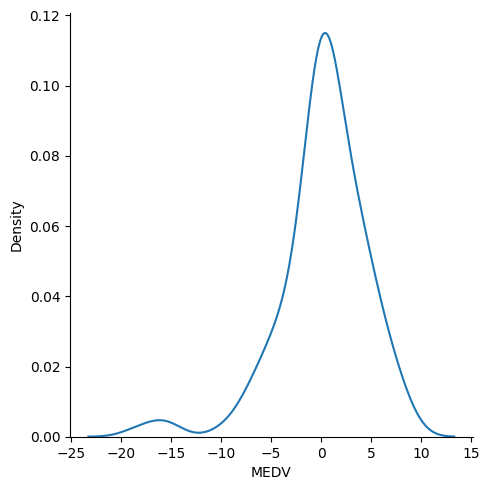

In [89]:
import seaborn as sns
sns.displot(reg_pred-ytest,kind='kde')

In [90]:
from sklearn.metrics import r2_score
score=r2_score(reg_pred,ytest)

In [91]:
score

0.6244098133718572

# Ridge Regression Algortihm

In [96]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [97]:
ridge_regressor=Ridge()

In [114]:
parameters={'alpha':[1,2,5,6,7,8,9,10,15,20,25,30,40,50,60,70,80,90]}
ridgecv=GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)
ridgecv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40,
                                   50, 60, 70, 80, 90]},
             scoring='neg_mean_squared_error')

In [115]:
print(ridgecv.best_params_)

{'alpha': 6}


In [116]:
print(ridgecv.best_score_)

-23.68502291074267


In [117]:
ridge_pred=ridgecv.predict(xtest)

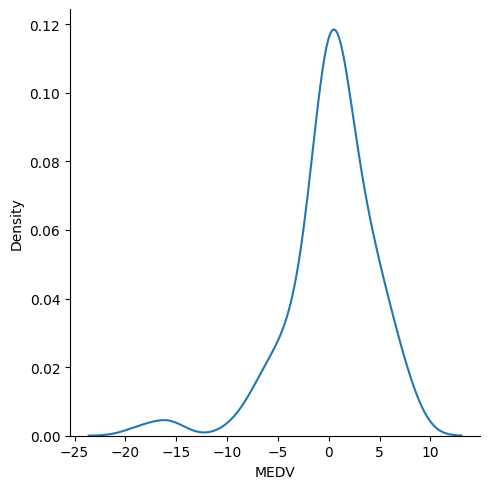

In [118]:
sns.displot(ridge_pred-ytest,kind='kde')

In [119]:
score=r2_score(ridge_pred,ytest)

In [120]:
score

0.6143730683361788